In [1]:

import sys
import pandas as pd
sys.path.append(r'C:\Users\clima\Desktop\Aptamers\src')
import numpy as np
import forgi.visual.mplotlib as fvm
from forgi.graph.bulge_graph import BulgeGraph
import matplotlib.pyplot as plt
from minimization import ty_fold
import time
from seqfold import fold, dot_bracket
df = pd.read_csv(r'C:\Users\clima\Desktop\Aptamers\data\dna.csv')



In [2]:
d_y= { 'our': [], 'our_time': [],'seqfold': [], 'seqfold_time': [], 'UNAfold' : [], 'seq': []}
for count, seq in enumerate(df['seq']):
    if 'U' not in seq:
        print(seq)
        start_time = time.time()
        structs = ty_fold(seq)
        d_y['our_time'].append(time.time()-start_time)
        start_time = time.time()
        structs1 = fold(seq)
        d_y['seqfold_time'].append(time.time()-start_time)
        sss = 0
        sss1 = 0
        for s in structs:     
            sss +=s.e
        for s in structs1:
            sss1 +=s.e
        d_y['our'].append(sss)
        d_y['seqfold'].append(sss1)
        d_y['UNAfold'].append(df['UNAFold'][count])
        d_y['seq'].append(seq)
        
df2 = pd.DataFrame(d_y)
df2.head()


GGGAGGTCGTTACATCTGGGTAACACCGGTACTGATCCGGTGACCTCCC
GGGAGGTCGCTCCAGCTGGGAGGAGCGTTGGGGGTATATACCCCCAACACCGGTACTGATCCGGTGACCTCCC
TAGCTCAGCTGGGAGAGCGCCTGCTTTGCACGCAGGAGGT
GGGGGCATAGCTCAGCTGGGAGAGCGCCTGCTTTGCACGCAGGAGGTCTGCGGTTCGATCCCGCGCGCTCCCACCA
TGAGACGGAAGGGGATGATTGTCCCCTTCCGTCTCA
ACCCCCTCCTTCCTTGGATCAAGGGGCTCAA
TGTCAGAAGTTTCCAAATGGCCAGCAATCAACCCATTCCATTGGGGATACAATGGTACAGTTTCGCATATTGTCGGTGAAAATGGTTCCATTAAACTCC


,our,our_time,seqfold,seqfold_time,UNAfold,seq
0,-13.7,0.282361,-13.4,0.096015,-10.9,GGGAGGTCGTTACATCTGGGTAACACCGGTACTGATCCGGTGACCTCCC
1,-26.7,7.184260,-21.8,0.446410,-23.4,GGGAGGTCGCTCCAGCTGGGAGGAGCGTTGGGGGTATATACCCCCA...
2,-3.2,0.047034,-3.2,0.034467,-6.9,TAGCTCAGCTGGGAGAGCGCCTGCTTTGCACGCAGGAGGT
3,-17.1,4.821850,-16.8,0.550546,-15.5,GGGGGCATAGCTCAGCTGGGAGAGCGCCTGCTTTGCACGCAGGAGG...
4,-17.8,0.033123,-17.8,0.016306,-18.1,TGAGACGGAAGGGGATGATTGTCCCCTTCCGTCTCA


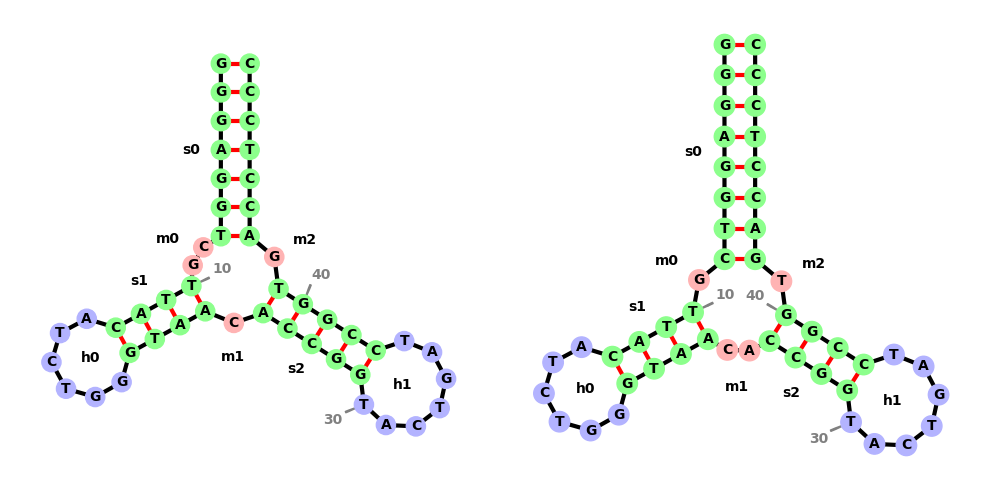

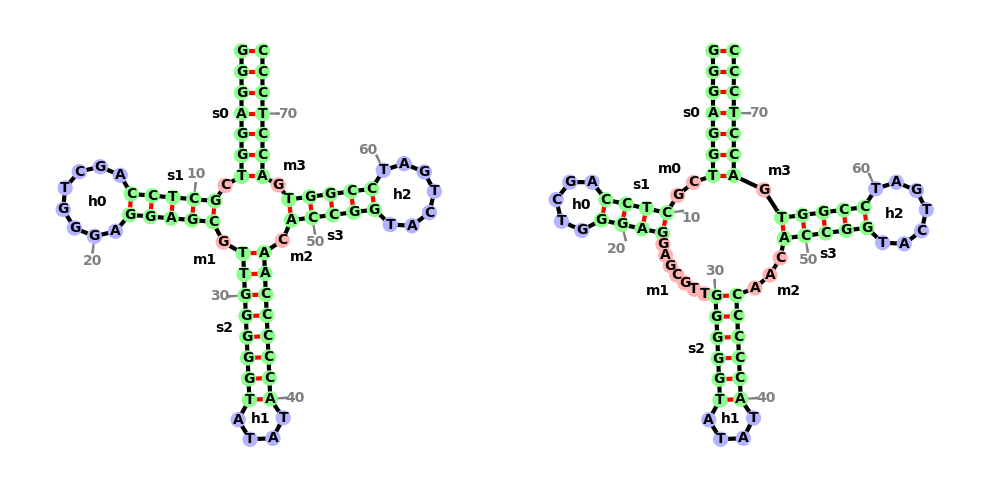

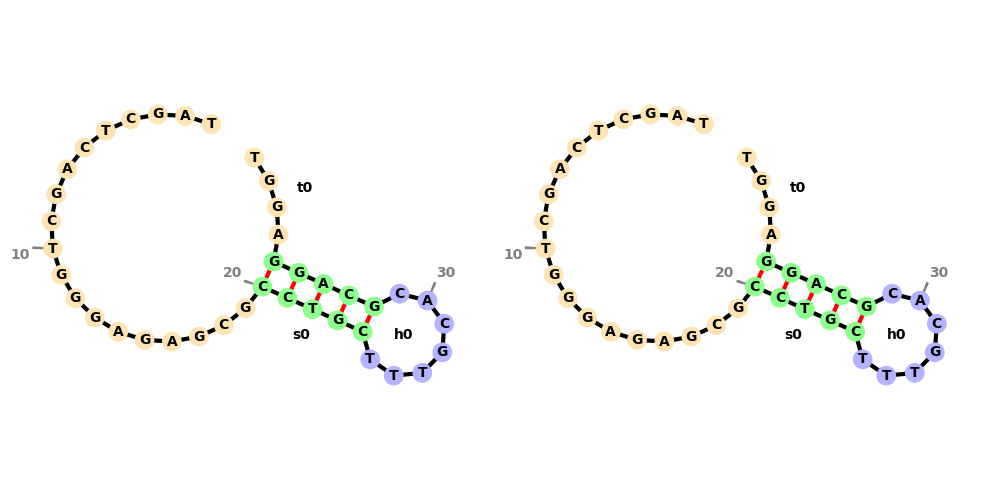

c:\Users\clima\anaconda3b\envs\aptamers_fold\Lib\site-packages\forgi\visual\mplotlib.py:118: RuntimeWarning: invalid value encountered in divide
  norm_vec/=ftuv.magnitude(norm_vec)


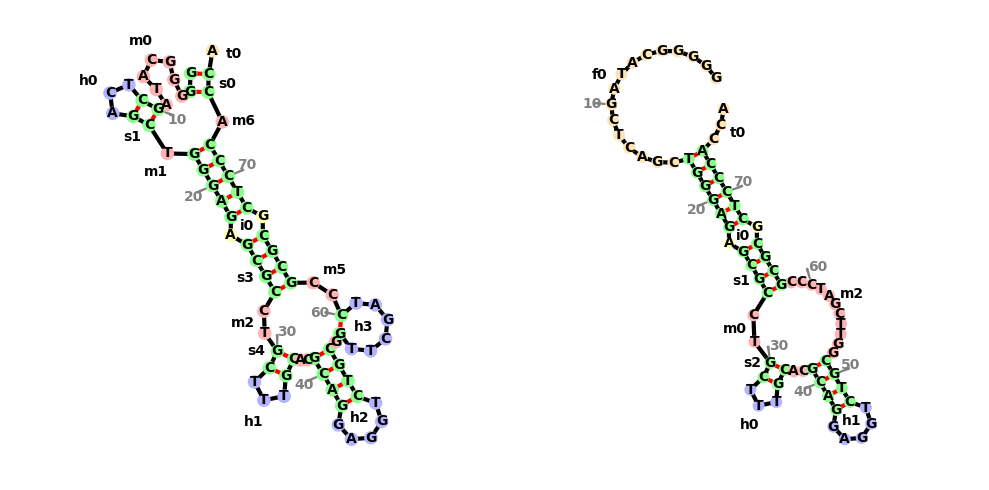

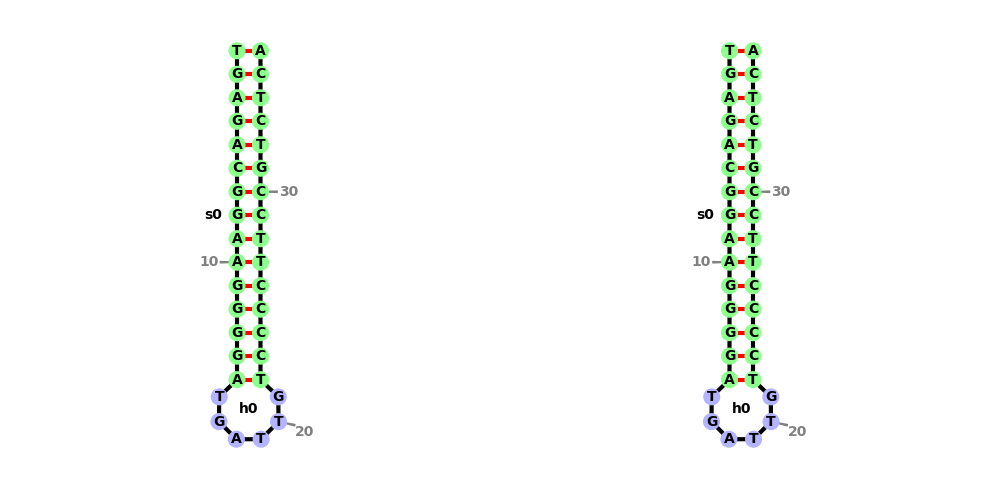

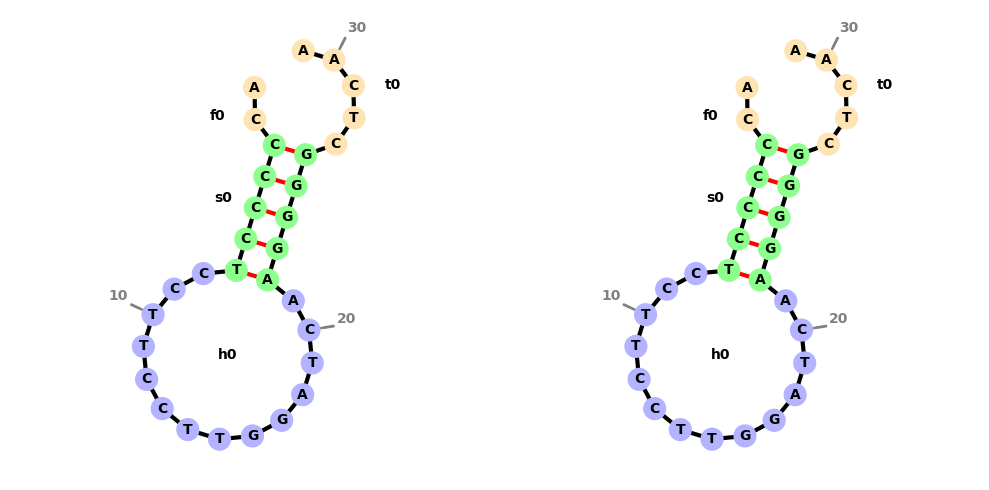

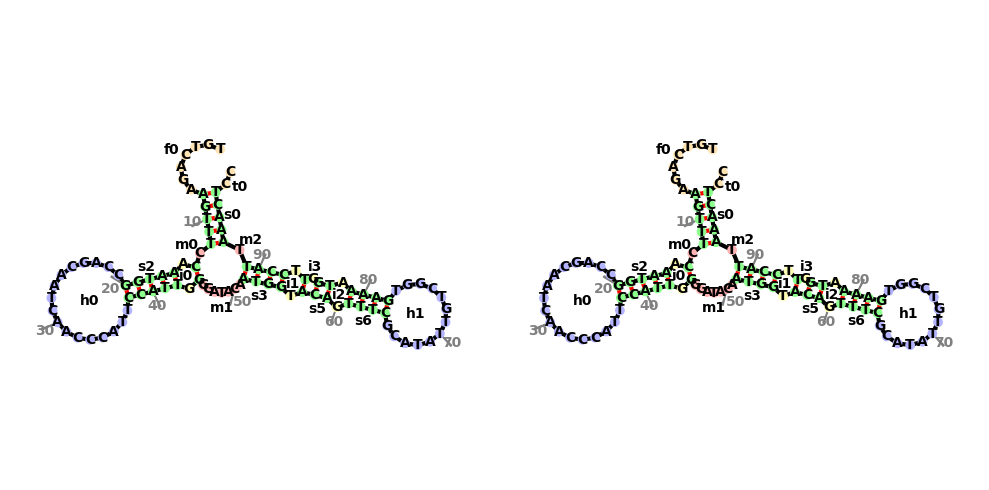

In [3]:

for count, seq in enumerate(df['seq']):
    if 'U' not in seq:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        structs = ty_fold(seq)
        d_b = dot_bracket( seq, structs)
        bg = BulgeGraph.from_dotbracket( d_b  ,  seq)
        fvm.plot_rna(bg,ax = ax1, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})

        structs = fold(seq)
        d_b = dot_bracket( seq, structs)
        bg = BulgeGraph.from_dotbracket( d_b  ,  seq)
        fvm.plot_rna(bg,  ax= ax2, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})

        # Adjust layout
        plt.tight_layout()

        # Show the plot
        plt.show()



In [4]:

'''
df = pd.read_csv(r'C:\Users\clima\Desktop\Aptamers\data\preprocessed _files\UNAfold_merged_all.csv')
print('Numeber sequences after merge:',len(df))
df = df.drop_duplicates(subset='Sequence')
print('Numeber of unique sequences after preprocessing:',len(df))
'''


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 22-23: truncated \UXXXXXXXX escape (2890178570.py, line 1)